# Machine Learning on Text: Clustering Assignment

In [19]:
import spacy

!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [18]:
import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\c\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\c\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\c\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\c\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
!pip install yellowbrick

In [17]:
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

### Ingest the company_profiles data set into a corpus.

In [15]:
DOC_PATTERN = r".*\.txt"
path = "company_profiles/"

corpus = PlaintextCorpusReader(path, DOC_PATTERN)

### Create a list of documents by extracting the raw text for each fileid in the corpus.

In [20]:
docs = [corpus.raw(id_) for id_ in corpus.fileids()]

### Preprocess the documents, including the steps below.

- Word tokenize the document.
- Lowercase all tokens.
- Lemmatize and stem the tokens.
- Remove stop words and punctuation.

In [21]:
def preprocess(docs):
    lemmatizer = WordNetLemmatizer()
    stemmer = SnowballStemmer("english")
    preprocessed = []

    for doc in docs:
        tokenized = word_tokenize(doc)
        cleaned = [stemmer.stem(lemmatizer.lemmatize(token.lower()))
        for token in tokenized
        if not token.lower() in stopwords.words("english")
        if token.isalpha()]

        untokenized = " ".join(cleaned)
        preprocessed.append(untokenized)

    return preprocessed

In [22]:
preprocessed = preprocess(docs)

### TF-IDF vectorize the preprocessed documents.

In [24]:
preprocessed[0:5]

['agil technolog provid applic focus solut life scienc diagnost appli chemic market worldwid oper three segment life scienc appli market diagnost genom agil crosslab life scienc appli market segment offer liquid chromatographi system compon liquid chromatographi mass spectrometri system gas chromatographi system compon gas chromatographi mass spectrometri system induct coupl plasma mass spectrometri instrument atom absorpt instrument microwav emiss spectrometri instrument induct coupl plasma optic emiss spectrometri instrument raman spectroscopi microfluid base autom electrophoresi product cell analysi plate base assay laboratori softwar informat system laboratori autom dissolut test vacuum pump measur technolog diagnost genom segment provid reagent instrument softwar consum array dna mutat detect genotyp gene copi number determin identif gene rearrang dna methyl profil gene express profil well sequenc target enrich servic equip focus product synthes oligonucleotid use activ pharmaceut

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True)

X = vectorizer.fit_transform(preprocessed)

tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

tfidf_df

,aaa,aac,aad,aaon,aar,aaron,aastrom,aav,ab,abacus,...,zvex,zydeco,zydelig,zydi,zynerba,zynga,zyrtec,zytiga,zyvox,übermonst
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.240561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3554,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3555,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3556,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


### Determine the optimal number of clusters using the Yellowbrick library's KElbow Visualizer and a KMeans clustering algorithm.

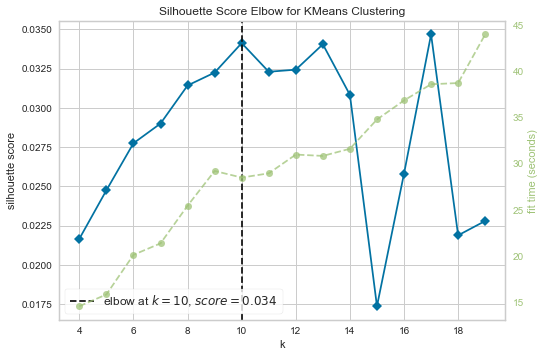

In [27]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5)
visualizer = KElbowVisualizer(model, k=(4,20), metric='silhouette')
visualizer.fit(tfidf_df)
visualizer.show()

K=10 seems to be the best n_clusters.

### Perform K-Means Clustering using the optimal number of clusters determine in the previous step.

In [28]:
model = KMeans(n_clusters=10)
clusters = model.fit_predict(tfidf_df)

### Perform Agglomerative Clustering using the same number of clusters.

In [29]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=10)
agg_clusters = agg.fit_predict(tfidf_df)

### Choose one of the three topic modeling approaches covered. Cluster into the optimal number of clusters and extract 5 keywords that represent the documents in each cluster.

In [31]:
from sklearn.decomposition import NMF

num_keywords = 5
num_topics = 10

vectorizer = TfidfVectorizer()
model = NMF(n_components=num_topics)

vectorized = vectorizer.fit_transform(preprocessed)
model.fit_transform(vectorized)

results = [[(vectorizer.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-num_keywords - 1:-1]] for topic in model.components_]
topics = [[x[0] for x in i] for i in results]

In [32]:
results

[[('loan', 2.4696587047227045),
  ('bank', 1.5004057940444504),
  ('deposit', 1.200620928981897),
  ('account', 1.026875216670582),
  ('commerci', 0.7025937899741346)],
 [('servic', 1.9366885530464206),
  ('manag', 0.6530704916895533),
  ('segment', 0.6290026477617796),
  ('provid', 0.44486869967681225),
  ('financi', 0.39380590498704837)],
 [('gas', 1.2879951836149561),
  ('natur', 1.004876254580034),
  ('oil', 0.986723182303686),
  ('energi', 0.4961823229234074),
  ('texa', 0.4135600007678821)],
 [('fund', 1.305652854526727),
  ('invest', 1.297303414968405),
  ('equiti', 0.6001774255256819),
  ('incom', 0.480565032381738),
  ('stock', 0.4229116847906725)],
 [('treatment', 0.7927449124397344),
  ('phase', 0.7356982652182869),
  ('clinic', 0.7267738155807373),
  ('trial', 0.6642017432598656),
  ('develop', 0.6015147930407393)],
 [('system', 0.8092493598124701),
  ('product', 0.7858099814690285),
  ('manufactur', 0.7067718245025076),
  ('industri', 0.6950193664528546),
  ('segment', 0.6

In [33]:
topics

[['loan', 'bank', 'deposit', 'account', 'commerci'],
 ['servic', 'manag', 'segment', 'provid', 'financi'],
 ['gas', 'natur', 'oil', 'energi', 'texa'],
 ['fund', 'invest', 'equiti', 'incom', 'stock'],
 ['treatment', 'phase', 'clinic', 'trial', 'develop'],
 ['system', 'product', 'manufactur', 'industri', 'segment'],
 ['insur', 'life', 'liabil', 'product', 'casualti'],
 ['store', 'brand', 'product', 'retail', 'oper'],
 ['properti', 'real', 'estat', 'invest', 'trust'],
 ['solut', 'softwar', 'data', 'network', 'communic']]